In [1]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scikit_posthocs as sp
import math
import plotly.express as px
import plotly

%matplotlib inline

In [71]:
df = pd.read_excel('/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Total_Data_2.xlsx')

In [72]:
df.columns

Index(['Name', 'Channer_num', 'Sub', 'Vdo_num', 'Total_Video', 'Video_View',
       'Like_Number', 'Video_Time', 'Item_Name', 'Item_Price', 'Total_Chat',
       'Chat_User', 'Chat_Num_per_user', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'No_Event_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'Dict_Positive', 'Dict_Negative',
       'Dict_Neutral', 'Dict_Positive_Rate', 'Dict_Negative_Rate',
       'Dict_Neutral_Rate', 'Dict_Score_Average', 'GPT_Positive',
       'GPT_Negative', 'GPT_Neutral', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
       'GPT_Neutral_Rate', 'GPT_Score_Average', 'KoBERT_Positive',
       'KoBERT_Negative', 'KoBERT_Neutral', 'KoBERT_Positive_Rate',
       'KoBERT_Negative_Rate', 'KoBERT_Neutral_Rate', 'KoBERT_Score_Average',
       'Tour_only', 'words'],
      dtype='object')

In [74]:
dff = df[df['Total_Chat']>=10]
dff.to_excel('/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Total_Data_3.xlsx')

In [ ]:
for i in range(len(df)):
  df.loc[i, 'log_Total_Chat'] = math.log10(df.loc[i, 'Total_Chat'])
  df.loc[i, 'log_Chat_User'] = math.log10(df.loc[i, 'Chat_User'])
  df.loc[i, 'log_Chat_Num_per_user'] = math.log10(df.loc[i, 'Chat_Num_per_user'])


In [ ]:
# ax = sns.scatterplot(x=df.Total_Chat, y=df.GPT_Score_Average)
# ax = sns.scatterplot(x=df.Chat_User, y=df.GPT_Score_Average)
ax = sns.scatterplot(x=df.Chat_Num_per_user, y=df.GPT_Score_Average)

In [ ]:
ax = sns.scatterplot(x=df[df['Total_Chat'] >= 300].Total_Chat, y=df.GPT_Score_Average)

In [68]:
dff = df[df['Total_Chat']>=10]

dff = dff[['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Positive',
       'GPT_Negative', 'GPT_Neutral', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
       'GPT_Neutral_Rate', 'GPT_Score_Average']]

In [69]:
dff[dff.Video_View < 10]

,Vdo_num,Sub,Video_View,Like_Number,Chat_User,Chat_Num_per_user,Total_Chat,Norm_Chat,Event_Chat,Hello_Chat,...,Event_Rate,Hello_Rate,Question_Rate,GPT_Positive,GPT_Negative,GPT_Neutral,GPT_Positive_Rate,GPT_Negative_Rate,GPT_Neutral_Rate,GPT_Score_Average
65,453043,1727,0,0,138,3.9855,550,458,0,13,...,0.0000,0.0236,0.1436,225,16,298,0.4091,0.0291,0.5418,0.4787
112,285880,1727,0,0,32,7.8750,252,203,0,3,...,0.0000,0.0119,0.1825,118,12,119,0.4683,0.0476,0.4722,0.5823
631,926982,7950,0,0,12,8.4167,101,91,4,2,...,0.0396,0.0198,0.0396,42,4,51,0.4158,0.0396,0.5050,0.6082


In [ ]:
fig = plt.figure(figsize=(28,28))

widths = [7, 7, 7, 7]
heights = [7, 7, 7, 7]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=4, nrows=4, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

for k, i in enumerate(dff.columns):
  x = dff[i]
  y = df.GPT_Score_Average
  plot = sns.scatterplot(x = x , y=y, ax=axs[k], legend = False)
  plot.set(ylim=(-0.2, 2))
  plot.set(ylabel='GPT Sentiment Score')

In [ ]:
limit_value = 1.2
px.scatter(x=df[df.Chat_Num_per_user>=limit_value].log_Chat_Num_per_user, y=df[df.Chat_Num_per_user>=limit_value].GPT_Score_Average, trendline= 'ols',trendline_color_override = 'red', labels = {'x' :'Chat Number per User', 'y': 'Sentiment Score'})

<ipython-input-12-7ed2666cf73e>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand1, color="red", shade=True, label='Sentiment Dict')
<ipython-input-12-7ed2666cf73e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand2, color="green", shade=True, label='GPT_3.5')
<ipython-input-12-7ed2666cf73e>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand3, color="blue", shade=True, label='KoBERT')


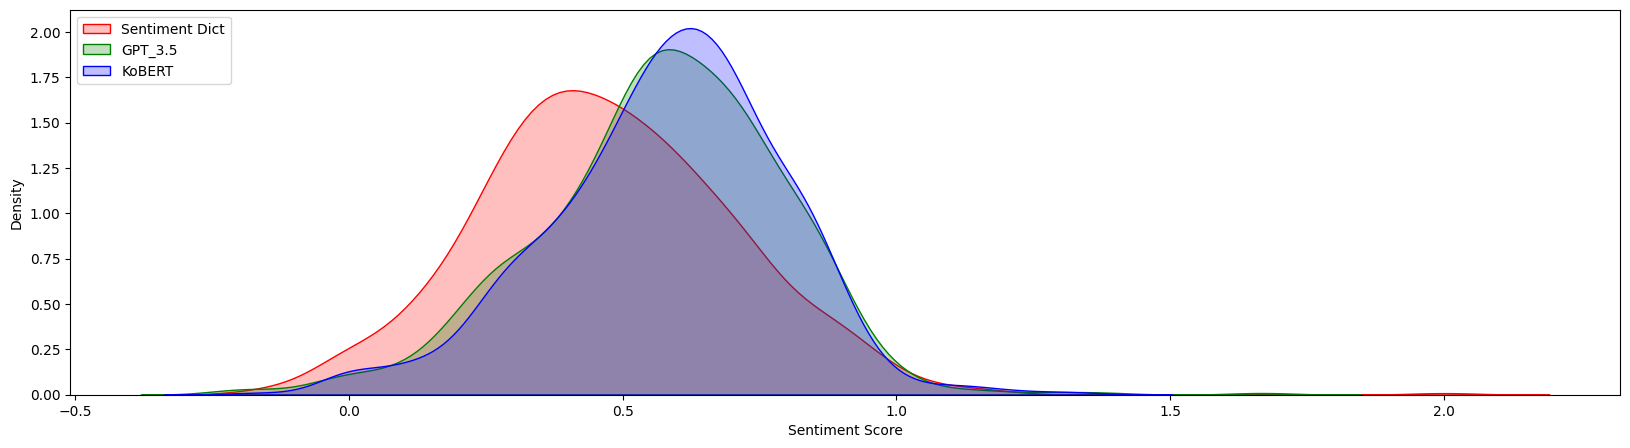

In [ ]:
rand1 = df.Dict_Score_Average
rand2 = df.GPT_Score_Average
rand3 = df.KoBERT_Score_Average

plt.figure(figsize=(20,5))

sns.kdeplot(data=rand1, color="red", shade=True, label='Sentiment Dict')
sns.kdeplot(data=rand2, color="green", shade=True, label='GPT_3.5')
sns.kdeplot(data=rand3, color="blue", shade=True, label='KoBERT')
plt.xlabel('Sentiment Score')
plt.legend(loc = 2)
plt.show()

In [ ]:
stats.kruskal(rand1, rand2, rand3)
x = [rand1, rand2, rand3]
pd.options.display.float_format = '{:.4f}'.format
sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3
1,1.0000,0.0000,0.0000
2,0.0000,1.0000,0.3648
3,0.0000,0.3648,1.0000


In [ ]:
stats.kruskal(rand1, rand2, rand3)
# 

KruskalResult(statistic=113.56315064667696, pvalue=2.1881402923905135e-25)

In [ ]:
dff = df[['Sub','Total_Chat',
       'Chat_User', 'Chat_Num_per_user', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'No_Event_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate','GPT_Score_Average', 'Tour_only']]

In [ ]:
dff = df[['Chat_User', 'Chat_Num_per_user',
          'Total_Chat','Norm_Chat', 'Event_Rate', 'Hello_Rate', 'Question_Rate', 
          'Dict_Positive_Rate', 'Dict_Negative_Rate','Dict_Neutral_Rate', 'Dict_Score_Average']]

In [ ]:
dff = df[['Total_Chat','Norm_Chat', 'Event_Rate', 'Hello_Rate', 'Question_Rate',
          'Chat_User', 'Chat_Num_per_user',
          'GPT_Positive_Rate', 'GPT_Negative_Rate','GPT_Neutral_Rate', 'GPT_Score_Average']]

In [ ]:
dff = df[['Total_Chat','Norm_Chat', 'Event_Rate', 'Hello_Rate', 'Question_Rate',
          'Chat_User', 'Chat_Num_per_user',
          'KoBERT_Positive_Rate','KoBERT_Negative_Rate', 'KoBERT_Neutral_Rate', 'KoBERT_Score_Average']]

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
# dff[(dff['Total_Chat']>0) & (dff['Total_Chat']<103)].describe()
# dff[(dff['Total_Chat']>102) & (dff['Total_Chat']<374)].describe()
# dff[(dff['Total_Chat']>373) & (dff['Total_Chat']<1269)].describe()
dff[(dff['Total_Chat']>1268) & (dff['Total_Chat']<4169)].describe()

,Total_Chat,Norm_Chat,Event_Rate,Hello_Rate,Question_Rate,Chat_User,Chat_Num_per_user,KoBERT_Positive_Rate,KoBERT_Negative_Rate,KoBERT_Neutral_Rate,KoBERT_Score_Average
count,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000
mean,2151.6114,1833.7486,0.0753,0.0367,0.0482,776.9886,4.4221,0.5603,0.0263,0.3817,0.6794
std,596.3976,632.5176,0.0926,0.0242,0.0347,541.2500,5.7583,0.1327,0.0267,0.1090,0.1657
min,1276.0000,528.0000,0.0000,0.0012,0.0007,25.0000,1.4549,0.2278,0.0010,0.1541,0.0717
25%,1695.0000,1361.0000,0.0037,0.0182,0.0240,413.0000,2.2577,0.4630,0.0118,0.2848,0.5689
50%,2071.0000,1724.0000,0.0419,0.0308,0.0436,588.0000,3.1582,0.5533,0.0186,0.3900,0.6816
75%,2580.5000,2359.5000,0.1096,0.0492,0.0620,1000.5000,4.2478,0.6806,0.0311,0.4670,0.8106
max,4168.0000,3578.0000,0.5044,0.1360,0.1715,2442.0000,63.6800,0.8257,0.2249,0.6601,1.0445


In [ ]:
# dff[(dff['Chat_User']>0) & (dff['Chat_User']<21)].describe()
# dff[(dff['Chat_User']>20) & (dff['Chat_User']<78)].describe()
# dff[(dff['Chat_User']>77) & (dff['Chat_User']<353)].describe()
dff[(dff['Chat_User']>352) & (dff['Chat_User']<2443)].describe()

,Total_Chat,Norm_Chat,Event_Rate,Hello_Rate,Question_Rate,Chat_User,Chat_Num_per_user,KoBERT_Positive_Rate,KoBERT_Negative_Rate,KoBERT_Neutral_Rate,KoBERT_Score_Average
count,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000,175.0000
mean,2004.3486,1705.4057,0.0683,0.0461,0.0472,811.2857,2.8801,0.5759,0.0248,0.3689,0.6951
std,729.2422,717.5347,0.0797,0.0285,0.0335,510.5363,1.1376,0.1297,0.0269,0.1058,0.1628
min,441.0000,401.0000,0.0000,0.0012,0.0007,353.0000,1.1667,0.2278,0.0010,0.1541,0.0717
25%,1463.5000,1130.0000,0.0035,0.0243,0.0239,448.5000,2.0802,0.4829,0.0117,0.2827,0.5967
50%,1941.0000,1598.0000,0.0386,0.0393,0.0431,588.0000,2.6779,0.5737,0.0172,0.3713,0.7095
75%,2567.0000,2264.5000,0.1066,0.0635,0.0618,1000.5000,3.5567,0.6833,0.0266,0.4475,0.8195
max,4168.0000,3578.0000,0.3697,0.1383,0.1668,2442.0000,7.3739,0.8257,0.2249,0.6601,1.0445


In [ ]:
# dff[(dff['Chat_Num_per_user']>0) & (dff['Chat_Num_per_user']<2.39)].describe()
# dff[(dff['Chat_Num_per_user']>2.38) & (dff['Chat_Num_per_user']<3.61)].describe()
# dff[(dff['Chat_Num_per_user']>3.60) & (dff['Chat_Num_per_user']<5.92)].describe()
dff[(dff['Chat_Num_per_user']>5.91) & (dff['Chat_Num_per_user']<63.69)].describe()

,Total_Chat,Norm_Chat,Event_Rate,Hello_Rate,Question_Rate,Chat_User,Chat_Num_per_user,KoBERT_Positive_Rate,KoBERT_Negative_Rate,KoBERT_Neutral_Rate,KoBERT_Score_Average
count,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000,176.0000
mean,627.5455,536.5114,0.0358,0.0227,0.1053,67.2557,10.7481,0.4471,0.0422,0.4798,0.5319
std,757.1621,662.2796,0.0682,0.0186,0.0764,94.6837,6.7271,0.1263,0.0291,0.1149,0.1878
min,11.0000,7.0000,0.0000,0.0000,0.0115,1.0000,5.9167,0.0000,0.0000,0.2101,-0.0328
25%,134.0000,103.7500,0.0000,0.0099,0.0557,15.0000,6.8805,0.3611,0.0260,0.4109,0.4273
50%,320.0000,253.5000,0.0023,0.0183,0.0872,31.5000,8.5906,0.4621,0.0353,0.4582,0.5588
75%,790.5000,653.5000,0.0438,0.0317,0.1279,74.7500,11.7183,0.5281,0.0490,0.5409,0.6615
max,4168.0000,3532.0000,0.5044,0.1143,0.4286,616.0000,63.6800,0.7591,0.1667,1.0000,1.1042


In [ ]:
stats.shapiro(dff.KoBERT_Score_Average)

ShapiroResult(statistic=0.9877181053161621, pvalue=1.3151276107237209e-05)

In [ ]:
rand1 = dff[(dff['Total_Chat']>0) & (dff['Total_Chat']<103)].KoBERT_Score_Average
rand2 = dff[(dff['Total_Chat']>102) & (dff['Total_Chat']<374)].KoBERT_Score_Average
rand3 = dff[(dff['Total_Chat']>373) & (dff['Total_Chat']<1269)].KoBERT_Score_Average
rand4 = dff[(dff['Total_Chat']>1268) & (dff['Total_Chat']<4169)].KoBERT_Score_Average

In [ ]:
rand1 = dff[(dff['Chat_User']>0) & (dff['Chat_User']<21)].KoBERT_Score_Average
rand2 = dff[(dff['Chat_User']>20) & (dff['Chat_User']<78)].KoBERT_Score_Average
rand3 = dff[(dff['Chat_User']>77) & (dff['Chat_User']<353)].KoBERT_Score_Average
rand4 = dff[(dff['Chat_User']>352) & (dff['Chat_User']<2443)].KoBERT_Score_Average

In [ ]:
rand1 = dff[(dff['Chat_Num_per_user']>0) & (dff['Chat_Num_per_user']<2.39)].KoBERT_Score_Average
rand2 = dff[(dff['Chat_Num_per_user']>2.38) & (dff['Chat_Num_per_user']<3.61)].KoBERT_Score_Average
rand3 = dff[(dff['Chat_Num_per_user']>3.60) & (dff['Chat_Num_per_user']<5.92)].KoBERT_Score_Average
rand4 = dff[(dff['Chat_Num_per_user']>5.91) & (dff['Chat_Num_per_user']<63.69)].KoBERT_Score_Average

<ipython-input-165-de4cb59e1aac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand1, color="red", shade=True, label='Min~Q1')
<ipython-input-165-de4cb59e1aac>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand2, color="green", shade=True, label='Q1~Q2')
<ipython-input-165-de4cb59e1aac>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand3, color="blue", shade=True, label='Q2~Q3')
<ipython-input-165-de4cb59e1aac>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=rand4, colo

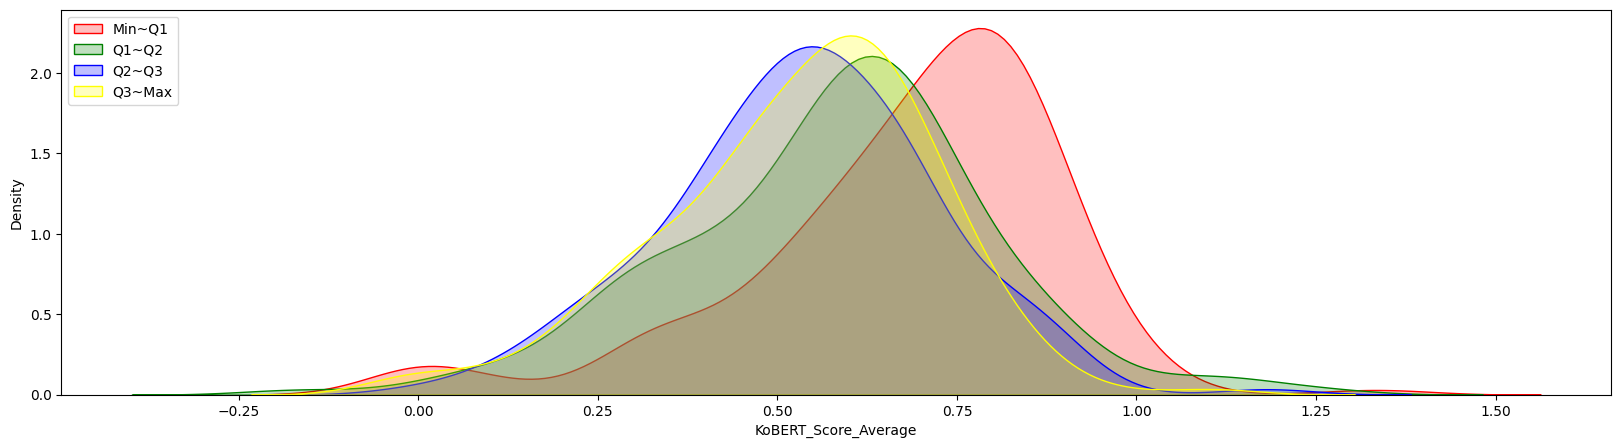

In [ ]:
plt.figure(figsize=(20,5))

sns.kdeplot(data=rand1, color="red", shade=True, label='Min~Q1')
sns.kdeplot(data=rand2, color="green", shade=True, label='Q1~Q2')
sns.kdeplot(data=rand3, color="blue", shade=True, label='Q2~Q3')
sns.kdeplot(data=rand4, color="yellow", shade=True, label='Q3~Max')

plt.legend(loc = 2)
plt.show()

In [ ]:
stats.kruskal(rand1, rand2, rand3, rand4)

KruskalResult(statistic=76.00716712464369, pvalue=2.20407236254358e-16)

In [ ]:
x = [rand1, rand2, rand3, rand4]

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3,4
1,1.0000,0.0000,0.0000,0.0000
2,0.0000,1.0000,0.0703,0.0703
3,0.0000,0.0703,1.0000,0.9213
4,0.0000,0.0703,0.9213,1.0000
